In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import *
import numpy as np
from keras import layers
from keras import models
from sklearn.preprocessing import MinMaxScaler

In [ ]:
def load_data(data):
    return pd.read_csv(data)

df=load_data('/content/AAPL.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)


In [ ]:
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.0500,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.1000,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.9000,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.0500,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.3200,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,AAPL,2020-05-18 00:00:00+00:00,314.960,316.500,310.3241,313.17,33843125,314.960000,316.500000,310.324100,313.170000,33843125,0.0,1.0
1254,AAPL,2020-05-19 00:00:00+00:00,313.140,318.520,313.0100,315.03,25432385,313.140000,318.520000,313.010000,315.030000,25432385,0.0,1.0
1255,AAPL,2020-05-20 00:00:00+00:00,319.230,319.520,316.2000,316.68,27876215,319.230000,319.520000,316.200000,316.680000,27876215,0.0,1.0
1256,AAPL,2020-05-21 00:00:00+00:00,316.850,320.890,315.8700,318.66,25672211,316.850000,320.890000,315.870000,318.660000,25672211,0.0,1.0


In [ ]:
df['symbol'].unique()
print(df.isna().sum())
df.info()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFa

In [ ]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [ ]:
print(df.divCash.unique())
df.divCash.unique()

[0.   0.52 0.57 0.63 0.73 0.77 0.82]


array([0.  , 0.52, 0.57, 0.63, 0.73, 0.77, 0.82])

In [ ]:
df['date']=pd.to_datetime(df.date)
df.head(10)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0
5,AAPL,2015-06-03 00:00:00+00:00,130.120,130.940,129.90,130.66,30983542,119.908625,120.664274,119.705890,120.406248,30983542,0.0,1.0
6,AAPL,2015-06-04 00:00:00+00:00,129.360,130.580,128.91,129.58,38450118,119.208267,120.332526,118.793582,119.411002,38450118,0.0,1.0
7,AAPL,2015-06-05 00:00:00+00:00,128.650,129.690,128.36,129.50,35626800,118.553986,119.512370,118.286744,119.337280,35626800,0.0,1.0
8,AAPL,2015-06-08 00:00:00+00:00,127.800,129.210,126.83,128.90,52674786,117.770691,119.070039,116.876813,118.784366,52674786,0.0,1.0
9,AAPL,2015-06-09 00:00:00+00:00,127.420,128.080,125.62,126.70,56075420,117.420512,118.028717,115.761770,116.757015,56075420,0.0,1.0


In [ ]:
df.groupby(df['date'].dt.to_period('M')).mean()

C:\Users\Emmanuel\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
2015-05,131.368333,131.886667,130.350000,131.143333,4.248367e+07,121.058993,121.536650,120.120575,120.851651,4.248367e+07,0.000000,1.0
2015-06,127.806364,128.761136,127.240645,128.055227,3.993667e+07,117.776555,118.656400,117.255232,118.005889,3.993667e+07,0.000000,1.0
2015-07,125.335455,126.203518,124.340000,125.450455,4.810367e+07,115.499554,116.299495,114.582220,115.605530,4.810367e+07,0.000000,1.0
2015-08,113.394762,115.500000,111.290476,113.445000,7.649329e+07,104.898828,106.845787,102.952033,104.944661,7.649329e+07,0.024762,1.0
2015-09,112.797619,114.207262,111.523624,112.998095,5.732329e+07,104.415130,105.720016,103.235811,104.600708,5.732329e+07,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01,311.916190,314.326186,308.831181,311.170881,3.495448e+07,310.346940,312.744811,307.277451,309.605380,3.495448e+07,0.000000,1.0
2020-02,311.270526,315.252632,306.726805,310.313158,3.974859e+07,310.289141,314.259619,305.759809,309.335364,3.974859e+07,0.040526,1.0
2020-03,262.444091,269.692714,254.846364,261.073409,7.137872e+07,261.752005,268.981512,254.174313,260.384938,7.137872e+07,0.000000,1.0


In [ ]:
df.head(5)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [ ]:
dm=df[['open', 'close', 'low', 'high', 'volume', 'divCash']].groupby(df.date.dt.month).mean()
dm

,open,close,low,high,volume,divCash
date,,,,,,
1,173.255819,173.562647,171.793054,174.930597,3.957420e+07,0.000000
2,174.750208,175.183385,173.230781,176.937709,3.647889e+07,0.033542
3,172.289853,172.618807,170.045194,175.090677,3.881237e+07,0.000000
4,178.959346,179.163495,177.304270,180.782774,3.138517e+07,0.000000
5,178.325794,178.831085,177.014641,180.250317,3.391053e+07,0.033208
6,149.713028,149.627570,148.559618,150.837122,3.146791e+07,0.000000
7,154.248716,154.340952,153.267180,155.368383,2.879275e+07,0.000000
8,159.900670,160.099196,158.485057,161.594072,3.802271e+07,0.028750
9,162.758663,162.655594,161.159987,164.137519,4.029565e+07,0.000000


Text(0.5, 1.0, 'Monthly open, close, high and low price')

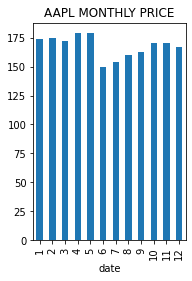

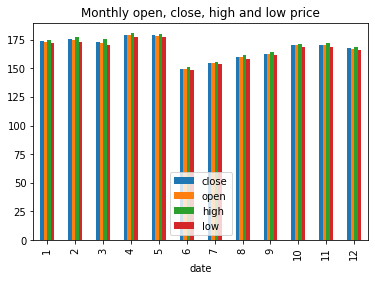

In [ ]:
plt.subplot(121)
dm.close.plot(kind='bar') #AAPL are at their lowest on June
plt.title('AAPL MONTHLY PRICE')
plt.subplot(121)
dm[['close','open', 'high', 'low']].plot(kind='bar')
plt.title('Monthly open, close, high and low price')


<AxesSubplot:>

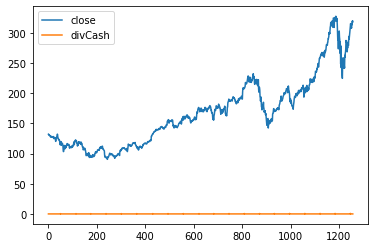

In [ ]:
df[['close', 'divCash']].plot()

<AxesSubplot:xlabel='date'>

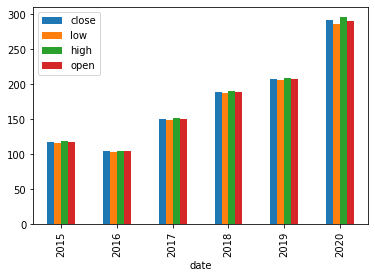

In [ ]:
dy=df[['open', 'close', 'low', 'high', 'volume', 'divCash']].groupby(df['date'].dt.year).mean()
dy
dy[['close', 'low', 'high', 'open']].plot(kind='bar')

Text(0.5, 1.0, 'AAPLE VOLUME IN M TF')

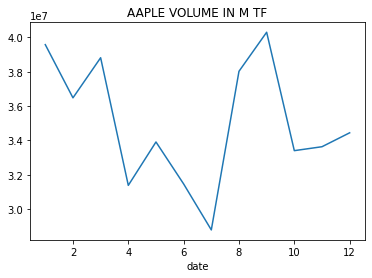

In [ ]:
dm['volume'].plot()
plt.title('AAPLE VOLUME IN M TF')

<Figure size 72000x72000 with 0 Axes>

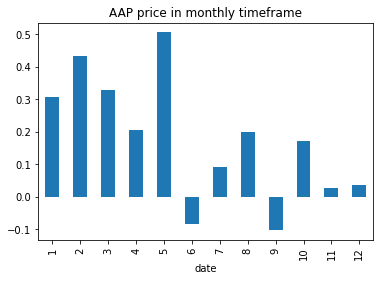

<Figure size 72000x72000 with 0 Axes>

In [ ]:
price=dm['close']-dm['open']
price.plot(kind='bar')
plt.title('AAP price in monthly timeframe')
plt.figure(figsize=(1000,1000))

In [ ]:
close=MinMaxScaler(feature_range=(0,1))
closing=close.fit(np.array(df['close']).reshape(-1,1))
closingg=close.transform(np.array(df['close']).reshape(-1,1))




In [ ]:
def seq(step, data):
    x=list(data)
    x_sequence=[]
    y_sequence=[]
    for i in range(step, len(x)):
        x_sequence.append(x[i-step:i])
        y_sequence.append([x[i]])
    return x_sequence, y_sequence

x, y=seq(68,closingg )
        
        

In [ ]:
print('length of x is:', len(x), '\nlength of y is:', len(y))

length of x is: 1190 
length of y is: 1190


In [ ]:
train=x[:-100]
train_label=y[:-100]
test=x[-100:]
test_label=y[-100:]
print('Train is:', len(train),'\nTrain Label is:', len(train_label), '\nTest is:', len(test), '\nTest Label:', len(test_label))

Train is: 1090 
Train Label is: 1090 
Test is: 100 
Test Label: 100


In [ ]:
np.array(train)

In [ ]:
train=np.array(train)
train_label=np.array(train_label)
test=np.array(test)
test_label=np.array(test_label)
train=train.reshape(1090, 68, 1)

In [ ]:
from keras.callbacks import EarlyStopping
call=EarlyStopping(monitor='val_loss',patience=10, verbose=1, restore_best_weights=True, mode='min' )

In [ ]:
train.shape

(1090, 68, 1)

In [ ]:

model=models.Sequential()
model.add(layers.GRU(64, input_shape=(68, 1), return_sequences=True))
model.add(layers.LSTM(64, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop', loss='mae', metrics='mae')





In [ ]:
hist=model.fit(train, train_label, epochs=30,batch_size=100, callbacks=call)

Epoch 1/30
11/11 [==============================] - 1s 122ms/step - loss: 0.0156 - mae: 0.0156
Epoch 2/30
11/11 [==============================] - 1s 126ms/step - loss: 0.0164 - mae: 0.0164
Epoch 3/30
11/11 [==============================] - 1s 123ms/step - loss: 0.0166 - mae: 0.0166
Epoch 4/30
11/11 [==============================] - 1s 122ms/step - loss: 0.0160 - mae: 0.0160
Epoch 5/30
11/11 [==============================] - 1s 123ms/step - loss: 0.0166 - mae: 0.0166
Epoch 6/30
11/11 [==============================] - 1s 121ms/step - loss: 0.0142 - mae: 0.0142
Epoch 7/30
11/11 [==============================] - 1s 124ms/step - loss: 0.0177 - mae: 0.0177
Epoch 8/30
11/11 [==============================] - 1s 121ms/step - loss: 0.0158 - mae: 0.0158
Epoch 9/30
11/11 [==============================] - 1s 123ms/step - loss: 0.0165 - mae: 0.0165
Epoch 10/30
11/11 [==============================] - 1s 125ms/step - loss: 0.0160 - mae: 0.0160
Epoch 11/30
11/11 [==============================

In [ ]:
histori=hist.history


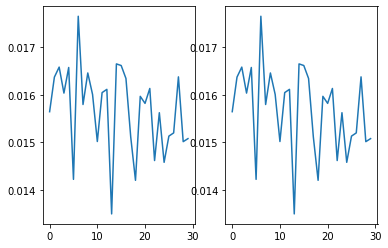

In [ ]:
plt.subplot(121)
plt.plot(histori['loss'])
plt.subplot(122)
plt.plot(histori['mae'])

In [ ]:
pred=model.predict(test)
pred=close.inverse_transform(pred)

In [ ]:
test_label=test_label.reshape(100,1)
test_label=close.inverse_transform(test_label)

In [ ]:
train_pred=model.predict(train)
train_pred=close.inverse_transform(train_pred)

In [ ]:
from sklearn.metrics import mean_absolute_error
print('MAE is:', mean_absolute_error(test_label, pred))

MAE is: 7.950080633544924


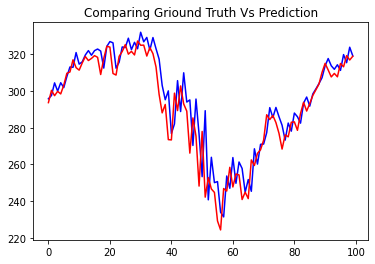

In [ ]:
plt.title('Comparing Ground Truth Vs Prediction')
plt.plot(pred, 'b')
plt.plot(test_label, 'r')


